In [9]:
import os
import pandas as pd
import geopandas as gpd
import plotly.express as px
%pylab inline

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 40000)
pd.set_option('display.max_rows', None)

df_safegraph_poi = pd.read_csv(os.path.join('..', 'dewey_data_filtered','SafeGraph_POI_Yellowstone_200miRadius.csv.gz'))
df_safegraph_spend = pd.read_csv(os.path.join('..', 'dewey_data_filtered','SafeGraph_SPEND_Yellowstone_200miRadius.csv.gz'))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [10]:
def map_points(fig,df):

    gdf_safegraph_poi = gpd.GeoDataFrame(df,
                                         geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
    fig = px.scatter_mapbox(
        gdf_safegraph_poi,
        lat='LATITUDE',
        lon='LONGITUDE',
        hover_name="LOCATION_NAME",
        hover_data=["CITY"],
        zoom=6,
        opacity=0.5)
  
    return fig

In [11]:
restaurant_naics = '7225'
mask = [ str(ncode)[:4]==restaurant_naics_naics for ncode in list(df_safegraph_poi['NAICS_CODE']) ]
df_food = df_safegraph_poi[mask]

if 'PLACEKEY' in df_safegraph_spend.columns:
    df_filtered = df_safegraph_spend[df_safegraph_spend['PLACEKEY'].isin(df_food['PLACEKEY'])]
else:
    print("Error: DataFrame does not contain 'PLACEKEY' column.")

print('(after filter)  # of rows: ', len(df_filtered))
print(df_filtered.head())

(after filter)  # of rows:  11910
               PLACEKEY                        SAFEGRAPH_BRAND_IDS        BRANDS   SPEND_DATE_RANGE_START     SPEND_DATE_RANGE_END  RAW_TOTAL_SPEND  RAW_NUM_TRANSACTIONS  RAW_NUM_CUSTOMERS  MEDIAN_SPEND_PER_TRANSACTION  MEDIAN_SPEND_PER_CUSTOMER SPEND_PER_TRANSACTION_PERCENTILES                                       SPEND_BY_DAY                       SPEND_PER_TRANSACTION_BY_DAY                               SPEND_BY_DAY_OF_WEEK                                         DAY_COUNTS  SPEND_PCT_CHANGE_VS_PREV_MONTH  SPEND_PCT_CHANGE_VS_PREV_YEAR  ONLINE_TRANSACTIONS  ONLINE_SPEND          TRANSACTION_INTERMEDIARY          SPEND_BY_TRANSACTION_INTERMEDIARY                 BUCKETED_CUSTOMER_FREQUENCY               MEAN_SPEND_PER_CUSTOMER_BY_FREQUENCY                     BUCKETED_CUSTOMER_INCOMES                  MEAN_SPEND_PER_CUSTOMER_BY_INCOME                                 CUSTOMER_HOME_CITY         RELATED_CROSS_SHOPPING_PHYSICAL_BRANDS_PCT        RELATE

In [13]:
fig = figure()
fig = map_points(fig,df_food)
fig.update_layout(title="Accomadations in Greater Yellowstone Region",height=800,width=1200,mapbox_style="open-street-map")

<Figure size 640x480 with 0 Axes>

In [20]:
import ast

datetime_start = pd.to_datetime('2019-05-01')
datetime_end = pd.to_datetime('2019-09-01')

df = df_filtered.copy()

df_filtered['SPEND_DATE_RANGE_START'] = pd.to_datetime(df_filtered['SPEND_DATE_RANGE_START'])
df_filtered['SPEND_DATE_RANGE_END'] = pd.to_datetime(df_filtered['SPEND_DATE_RANGE_END'])

df_filtered_2019 = df[(df_filtered['SPEND_DATE_RANGE_START'] >= datetime_start) &
                                 (df_filtered['SPEND_DATE_RANGE_END'] <= datetime_end)]

df = df_filtered_2019.copy()

# Convert string representations of lists in 'SPEND_BY_DAY' to actual lists
df['SPEND_BY_DAY'] = df['SPEND_BY_DAY'].apply(ast.literal_eval)

# Add a new column called 'DATE_OF_MONTH', as a list of integers from 1 to the end of the month (length of the 'SPEND_BY_DAY' list)
df['DATE_OF_MONTH'] = df['SPEND_BY_DAY'].apply(lambda x: list(range(1, len(x) + 1)))

df_spend_by_day = df.explode(['SPEND_BY_DAY', 'DATE_OF_MONTH'])

df_spend_by_day['SPEND_BY_DAY'] = df_spend_by_day['SPEND_BY_DAY'].astype(float)
df_spend_by_day['DATE_OF_MONTH'] = df_spend_by_day['DATE_OF_MONTH'].astype(int)

df_spend_by_day['DATE'] = pd.to_datetime(df_spend_by_day['SPEND_DATE_RANGE_START']) + pd.to_timedelta(df_spend_by_day['DATE_OF_MONTH'] - 1, unit='D')
df_spend_by_day['DATE'] = df_spend_by_day['DATE'].dt.strftime('%m-%d')

grouped_19_food = df_spend_by_day.groupby('DATE')['SPEND_BY_DAY'].sum()

C:\Users\tjbla\AppData\Local\Temp\ipykernel_6872\3068815724.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjbla\AppData\Local\Temp\ipykernel_6872\3068815724.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
datetime_start = pd.to_datetime('2020-05-01')
datetime_end = pd.to_datetime('2020-09-01')

df = df_filtered.copy()

df_filtered['SPEND_DATE_RANGE_START'] = pd.to_datetime(df_filtered['SPEND_DATE_RANGE_START'])
df_filtered['SPEND_DATE_RANGE_END'] = pd.to_datetime(df_filtered['SPEND_DATE_RANGE_END'])

df_filtered_2020 = df[(df_filtered['SPEND_DATE_RANGE_START'] >= datetime_start) &
                                 (df_filtered['SPEND_DATE_RANGE_END'] <= datetime_end)]

df = df_filtered_2020.copy()

# Convert string representations of lists in 'SPEND_BY_DAY' to actual lists
df['SPEND_BY_DAY'] = df['SPEND_BY_DAY'].apply(ast.literal_eval)

# Add a new column called 'DATE_OF_MONTH', as a list of integers from 1 to the end of the month (length of the 'SPEND_BY_DAY' list)
df['DATE_OF_MONTH'] = df['SPEND_BY_DAY'].apply(lambda x: list(range(1, len(x) + 1)))

df_spend_by_day = df.explode(['SPEND_BY_DAY', 'DATE_OF_MONTH'])

df_spend_by_day['SPEND_BY_DAY'] = df_spend_by_day['SPEND_BY_DAY'].astype(float)
df_spend_by_day['DATE_OF_MONTH'] = df_spend_by_day['DATE_OF_MONTH'].astype(int)

df_spend_by_day['DATE'] = pd.to_datetime(df_spend_by_day['SPEND_DATE_RANGE_START']) + pd.to_timedelta(df_spend_by_day['DATE_OF_MONTH'] - 1, unit='D')
df_spend_by_day['DATE'] = df_spend_by_day['DATE'].dt.strftime('%m-%d')

grouped_20_food = df_spend_by_day.groupby('DATE')['SPEND_BY_DAY'].sum()

C:\Users\tjbla\AppData\Local\Temp\ipykernel_6872\3346195129.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjbla\AppData\Local\Temp\ipykernel_6872\3346195129.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
datetime_start = pd.to_datetime('2021-05-01')
datetime_end = pd.to_datetime('2021-09-01')

df = df_filtered.copy()

df_filtered['SPEND_DATE_RANGE_START'] = pd.to_datetime(df_filtered['SPEND_DATE_RANGE_START'])
df_filtered['SPEND_DATE_RANGE_END'] = pd.to_datetime(df_filtered['SPEND_DATE_RANGE_END'])

df_filtered_2021 = df[(df_filtered['SPEND_DATE_RANGE_START'] >= datetime_start) &
                                 (df_filtered['SPEND_DATE_RANGE_END'] <= datetime_end)]

df = df_filtered_2021.copy()

# Convert string representations of lists in 'SPEND_BY_DAY' to actual lists
df['SPEND_BY_DAY'] = df['SPEND_BY_DAY'].apply(ast.literal_eval)

# Add a new column called 'DATE_OF_MONTH', as a list of integers from 1 to the end of the month (length of the 'SPEND_BY_DAY' list)
df['DATE_OF_MONTH'] = df['SPEND_BY_DAY'].apply(lambda x: list(range(1, len(x) + 1)))

df_spend_by_day = df.explode(['SPEND_BY_DAY', 'DATE_OF_MONTH'])

df_spend_by_day['SPEND_BY_DAY'] = df_spend_by_day['SPEND_BY_DAY'].astype(float)
df_spend_by_day['DATE_OF_MONTH'] = df_spend_by_day['DATE_OF_MONTH'].astype(int)

df_spend_by_day['DATE'] = pd.to_datetime(df_spend_by_day['SPEND_DATE_RANGE_START']) + pd.to_timedelta(df_spend_by_day['DATE_OF_MONTH'] - 1, unit='D')
df_spend_by_day['DATE'] = df_spend_by_day['DATE'].dt.strftime('%m-%d')

grouped_21_food = df_spend_by_day.groupby('DATE')['SPEND_BY_DAY'].sum()

C:\Users\tjbla\AppData\Local\Temp\ipykernel_6872\3242774707.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjbla\AppData\Local\Temp\ipykernel_6872\3242774707.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
datetime_start = pd.to_datetime('2022-05-01')
datetime_end = pd.to_datetime('2022-09-01')

df = df_filtered.copy()

df_filtered['SPEND_DATE_RANGE_START'] = pd.to_datetime(df_filtered['SPEND_DATE_RANGE_START'])
df_filtered['SPEND_DATE_RANGE_END'] = pd.to_datetime(df_filtered['SPEND_DATE_RANGE_END'])

df_filtered_2022 = df[(df_filtered['SPEND_DATE_RANGE_START'] >= datetime_start) &
                                 (df_filtered['SPEND_DATE_RANGE_END'] <= datetime_end)]

df = df_filtered_2022.copy()

# Convert string representations of lists in 'SPEND_BY_DAY' to actual lists
df['SPEND_BY_DAY'] = df['SPEND_BY_DAY'].apply(ast.literal_eval)

# Add a new column called 'DATE_OF_MONTH', as a list of integers from 1 to the end of the month (length of the 'SPEND_BY_DAY' list)
df['DATE_OF_MONTH'] = df['SPEND_BY_DAY'].apply(lambda x: list(range(1, len(x) + 1)))

df_spend_by_day = df.explode(['SPEND_BY_DAY', 'DATE_OF_MONTH'])

df_spend_by_day['SPEND_BY_DAY'] = df_spend_by_day['SPEND_BY_DAY'].astype(float)
df_spend_by_day['DATE_OF_MONTH'] = df_spend_by_day['DATE_OF_MONTH'].astype(int)

df_spend_by_day['DATE'] = pd.to_datetime(df_spend_by_day['SPEND_DATE_RANGE_START']) + pd.to_timedelta(df_spend_by_day['DATE_OF_MONTH'] - 1, unit='D')
df_spend_by_day['DATE'] = df_spend_by_day['DATE'].dt.strftime('%m-%d')

grouped_22_food = df_spend_by_day.groupby('DATE')['SPEND_BY_DAY'].sum()

C:\Users\tjbla\AppData\Local\Temp\ipykernel_6872\2216778773.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjbla\AppData\Local\Temp\ipykernel_6872\2216778773.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



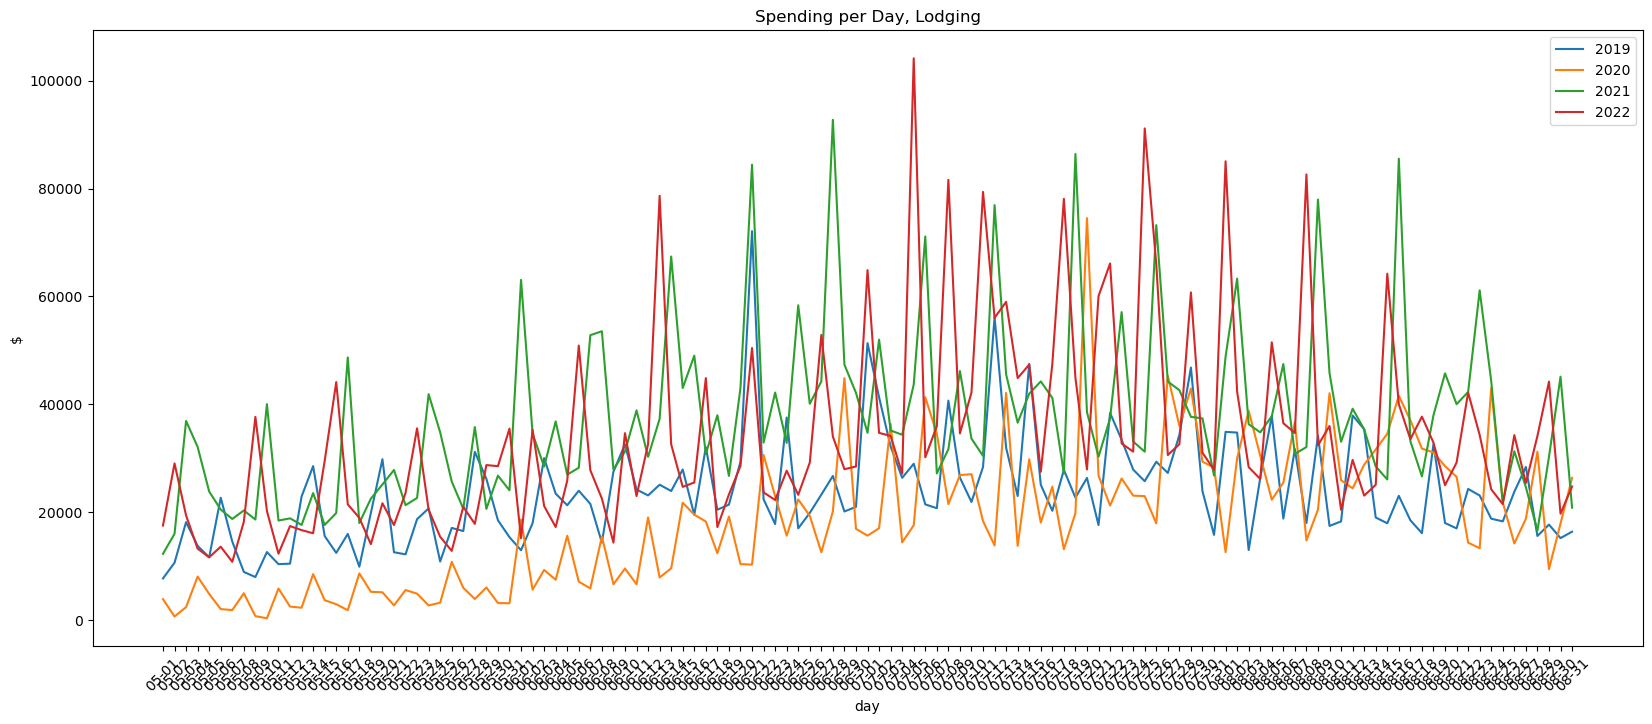

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(grouped_19_food);
plt.plot(grouped_20_food);
plt.plot(grouped_21_food);
plt.plot(grouped_22_food);
plt.title('Spending per Day, Food');
plt.xlabel('day');
plt.ylabel('$');
plt.xticks(rotation=45)
plt.legend(['2019', '2020', '2021', '2022']);